## Text Analysis For FB Post

### Objective : To translate and clean the data for use in FB Post Analysis

In [829]:
import pandas as pd
import numpy as np
import re
from googletrans import Translator
from langdetect import detect
from sklearn.learning_curve import learning_curve
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import datetime
import time
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from sklearn.model_selection import train_test_split,KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet,LogisticRegression #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,Normalizer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats
from sklearn import metrics
import sklearn as sk
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



from sklearn.metrics import roc_curve, auc,classification_report

%matplotlib inline

In [916]:
from numpy import loadtxt
from xgboost import plot_tree
import xgboost
import graphviz

In [217]:
def clean_text(txt):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return (re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt.lower()).split())



In [ ]:
lang_details=pd.read_clipboard()

In [243]:
lang_dict

{'af': 'Afrikaans',
 'af-ZA': 'Afrikaans (South Africa)',
 'ar': 'Arabic',
 'ar-AE': 'Arabic (U.A.E.)',
 'ar-BH': 'Arabic (Bahrain)',
 'ar-DZ': 'Arabic (Algeria)',
 'ar-EG': 'Arabic (Egypt)',
 'ar-IQ': 'Arabic (Iraq)',
 'ar-JO': 'Arabic (Jordan)',
 'ar-KW': 'Arabic (Kuwait)',
 'ar-LB': 'Arabic (Lebanon)',
 'ar-LY': 'Arabic (Libya)',
 'ar-MA': 'Arabic (Morocco)',
 'ar-OM': 'Arabic (Oman)',
 'ar-QA': 'Arabic (Qatar)',
 'ar-SA': 'Arabic (Saudi Arabia)',
 'ar-SY': 'Arabic (Syria)',
 'ar-TN': 'Arabic (Tunisia)',
 'ar-YE': 'Arabic (Yemen)',
 'az': 'Azeri (Latin)',
 'az-AZ': 'Azeri (Cyrillic) (Azerbaijan)',
 'be': 'Belarusian',
 'be-BY': 'Belarusian (Belarus)',
 'bg': 'Bulgarian',
 'bg-BG': 'Bulgarian (Bulgaria)',
 'bs-BA': 'Bosnian (Bosnia and Herzegovina)',
 'ca': 'Catalan',
 'ca-ES': 'Catalan (Spain)',
 'cs': 'Czech',
 'cs-CZ': 'Czech (Czech Republic)',
 'cy': 'Welsh',
 'cy-GB': 'Welsh (United Kingdom)',
 'da': 'Danish',
 'da-DK': 'Danish (Denmark)',
 'de': 'German',
 'de-AT': 'German (Aus

In [ ]:
lang_dict = dict(zip(lang_details.Code, lang_details.Name))

## Dataset being exported from the ipynb file FB_PostAnalysis..It has all the translated data

In [277]:
df=pd.read_csv('ExploreData.csv')

In [278]:
df.company_name.unique()

array(['Coca Cola', 'Nike', 'Microsoft', 'Starbucks', 'P&G'], dtype=object)

## Include the Viral column

In [254]:
df.Viral.value_counts()

0    15690
1     1309
Name: Viral, dtype: int64

In [279]:
master=df

In [280]:
master.drop('Unnamed: 0',axis=1,inplace=True)

In [281]:
master.trans_name.head()

0                        The Story of Cosmetics (2010)
1    Taiwan Demonstration Song Thai Wonder ☆ Theme ...
2    Neihu Community University, Taipei Social Ente...
3      Dr. network selling vegetables - Zhang Jun pole
4    Embrace the Generation Start with Education: A...
Name: trans_name, dtype: object

In [282]:
master['clean_name']=master.trans_name.apply(clean_text)

In [296]:
master.count()

company_name       16990
brand_name         16990
type               16990
rank_order         16990
total_comments     16990
total_likes        16990
total_reactions    16990
viewer_reaction    16990
shares_count       16990
weekday            16990
Hour               16990
Viral              16990
name_language      16829
trans_name         16990
clean_name         16990
dtype: int64

In [301]:
dummy_words=pd.get_dummies(master.clean_name.apply(pd.Series).stack()).sum(level=0)

In [317]:
master.head()


,company_name,brand_name,type,rank_order,total_comments,total_likes,total_reactions,viewer_reaction,shares_count,weekday,Hour,Viral,name_language,trans_name,clean_name
0,Coca Cola,Ilohas,video,chronological,2.0,1.0,1.0,NONE,0.0,1,6,0,English,The Story of Cosmetics (2010),"[the, story, of, cosmetics, 2010]"
1,Coca Cola,Ilohas,video,ranked,0.0,14.0,14.0,NONE,0.0,1,14,0,Japanese,Taiwan Demonstration Song Thai Wonder ☆ Theme ...,"[taiwan, demonstration, song, thai, wonder, th..."
2,Coca Cola,Ilohas,link,ranked,0.0,5.0,5.0,NONE,0.0,1,14,0,German,"Neihu Community University, Taipei Social Ente...","[neihu, community, university, taipei, social,..."
3,Coca Cola,Ilohas,video,ranked,1.0,15.0,15.0,NONE,0.0,1,12,0,Korean,Dr. network selling vegetables - Zhang Jun pole,"[dr, network, selling, vegetables, zhang, jun,..."
4,Coca Cola,Ilohas,video,ranked,0.0,16.0,16.0,NONE,3.0,1,12,0,Tagalog,Embrace the Generation Start with Education: A...,"[embrace, the, generation, start, with, educat..."


In [318]:
master_dummy=master.drop(['clean_name','trans_name','name_language'],axis=1)


In [319]:
master_dummy=pd.get_dummies(master_dummy)

In [320]:
master_dummy.head()

,total_comments,total_likes,total_reactions,shares_count,weekday,Hour,Viral,company_name_Coca Cola,company_name_Microsoft,company_name_Nike,...,type_link,type_note,type_offer,type_photo,type_status,type_video,rank_order_No Order,rank_order_chronological,rank_order_ranked,viewer_reaction_NONE
0,2.0,1.0,1.0,0.0,1,6,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0.0,14.0,14.0,0.0,1,14,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
2,0.0,5.0,5.0,0.0,1,14,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1.0,15.0,15.0,0.0,1,12,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0.0,16.0,16.0,3.0,1,12,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1


In [321]:
data_merge=pd.concat([master_dummy,dummy_words,master.name_language],join='inner',axis=1)

In [322]:
len(data_merge.columns)

7177

In [323]:
data_merge.count()

total_comments               16962
total_likes                  16962
total_reactions              16962
shares_count                 16962
weekday                      16962
Hour                         16962
Viral                        16962
company_name_Coca Cola       16962
company_name_Microsoft       16962
company_name_Nike            16962
company_name_P&G             16962
company_name_Starbucks       16962
brand_name_All               16962
brand_name_Aquarius          16962
brand_name_Ciel              16962
brand_name_Coca Cola Life    16962
brand_name_Dasani            16962
brand_name_DelValle          16962
brand_name_DietCoke          16962
brand_name_Fanta             16962
brand_name_Fresca            16962
brand_name_Fuze              16962
brand_name_FuzeTea           16962
brand_name_Georgia           16962
brand_name_GoldenPeak        16962
brand_name_HonestTea         16962
brand_name_Ilohas            16962
brand_name_MellowYellow      16962
brand_name_Microsoft

In [316]:
for x in data_merge.columns:
    print(x)

total_comments
total_likes
total_reactions
shares_count
weekday
Hour
Viral
company_name_Coca Cola
company_name_Microsoft
company_name_Nike
company_name_P&G
company_name_Starbucks
brand_name_All
brand_name_Aquarius
brand_name_Ciel
brand_name_Coca Cola Life
brand_name_Dasani
brand_name_DelValle
brand_name_DietCoke
brand_name_Fanta
brand_name_Fresca
brand_name_Fuze
brand_name_FuzeTea
brand_name_Georgia
brand_name_GoldenPeak
brand_name_HonestTea
brand_name_Ilohas
brand_name_MellowYellow
brand_name_Microsoft
brand_name_MinuteMaid
brand_name_Nike
brand_name_Odwalla
brand_name_P&G
brand_name_Powerade
brand_name_Schweppes
brand_name_SimplyOrange
brand_name_SmartWater
brand_name_Sprite
brand_name_Starbucks
brand_name_VitaminWater
type_event
type_link
type_note
type_offer
type_photo
type_status
type_video
rank_order_No Order
rank_order_chronological
rank_order_ranked
viewer_reaction_NONE
name_language_Afrikaans
name_language_Albanian
name_language_Catalan
name_language_Croatian
name_language_Cze

collide
collins
colombia
color
colorblocking
columbus
column
com
comanche
combat
combine
combines
combining
come
comeback
comedian
comedy
comercial
comes
comet
comfort
comic
coming
comm
commemorative
comment
commentary
commentator
comments
commerce
commercial
commissar
commitment
commitments
commits
committee
common
commons
commonwealth
comms
communicating
communication
communications
communicator
communities
community
commute
commuting
comp
companies
companion
company
compatible
compete
competition
competitiveness
compile
complaints
complements
complete
completely
completion
complexcon
composes
compost
comprehensive
compromise
computer
computers
computerworld
computex
computing
con
conan
concentrated
concept
concern
concert
concerts
concussions
conditions
conectam
conectamenteycorpo
conectamenteycuerpo
confer
conference
conferencing
confidence
confident
confidential
conflict
conga
congestion
congress
congressman
connect
connected
connecting
connection
connectivity
connectmen
connects


flash
flashes
flavor
flavored
flavorfied
flavorfy
flavors
flawless
flea
fleisher
flexible
flickerbox
flies
flight
flint
flip
flipboard
float
floating
flooding
floods
florida
flotard
flow
flower
fluid
fly
flying
flyingv
flyknit
fm
fm94
focus
focuses
fog
foldable
folk
following
follows
fong
food
foods
foot
football
footprint
for
foray
forbes
force
forced
forces
ford
forecast
foreigners
forest
forests
forever
forgame
forge
forget
form
former
formerly
formstack
formula
forthcoming
fortune
forum
forward
forza
foster
fosters
foto
found
foundation
founded
founder
founding
fountain
four
fours
foursquare
fourth
fox
foxworthy
fragmented
frame
framework
francesco
francis
francisco
frankel
franklin
franz
frappuccino
freaky
fred
free
freecallsto
freedom
freedompop
freestyle
freeze
freezing
french
fresa
fresca
fresh
friday
fridge
fried
friend
friendly
friends
friendship
frittata
from
front
frozen
fruit
fruits
fruity
fsc
ft
ft0410
ftw
fu
fuel
fueled
fuels
fukuyama
fulfill
full
fun
funcage
fund
fundra

offers
office
officer
officers
offices
official
officially
offsets
often
oh
oil
okc
oklahoma
ol
olay
old
olive
ollestad
olympian
olympians
olympic
olympics
on
once
one
onedrive
onenote
ones
ongoing
online
only
onterra
onto
onward
op
open
opened
opening
opens
operation
operations
operative
opportunities
opportunity
opposition
oppression
oprah
opry
optimizer
optimizing
options
optometry
or
oradea
orange
order
org
organic
organization
organizations
organized
organizers
origami
origin
original
origins
orphans
orth
ortiz
orzo
os
ost
ot
other
others
oui
ounce
our
ourselves
out
outatime
outdoor
outdoors
outlets
outline
outlook
outofoffice
output
outside
outstanding
over
overall
overcoming
overhaul
overlooked
overlooking
overly
overseas
own
owned
owner
owners
ownership
p
pa
pablo
pac
pace
pacific
pack
package
packages
packaging
packing
packs
pacquiao
pact
paddy
padgett
page
pagos
paid
paige
paigepadgett
pain
paint
painted
painting
pair
pairs
pakistan
pakpoom
palms
paloma
pampers
panama
pancake

tornado
toronto
toshiba
total
touch
touched
touching
touchofcare
touchscreen
tough
tour
tourist
tourists
tournament
toward
town
towns
township
tox
toxic
toy
toys
tpe
track
tracking
tractor
trade
trading
tradition
traditional
traditions
traffic
trafficking
trail
trailer
train
trainer
training
tranquility
tranquilo
transcends
transfair
transfer
transfiguration
transform
transformation
transformed
transforming
transforms
translator
transparency
transport
trash
travel
traveler
travelers
traveling
travelling
travels
tray
treasure
treasury
treat
treats
tree
treehouses
treehugger
trees
trello
trend
trends
trevor
trial
triathlon
tribal
tribe
tribes
tribune
tribute
trick
tricks
tried
triggers
trillion
trim
trip
trippin
trips
trista
tron
trophy
tropical
trouble
trout
truck
trucks
true
truefriendship
truesdale
truly
trump
trust
trusted
trusting
truth
try
trying
tsai
tsunami
tuan
tubbs
tube
tubing
tuesday
tufts
tumblr
turban
turbo
turf
turkey
turn
turned
turning
turns
tutorial
tutorials
tuzla
tv
t

## Baselining for English and Portuguese

In [814]:
X_data,y_data=data_merge.drop(['Viral','total_comments','total_likes','total_reactions','shares_count'],axis=1)\
,data_merge['Viral']
#hold out 30% of the data for final testing

In [815]:
X_data.head()

,weekday,Hour,company_name_Coca Cola,company_name_Microsoft,company_name_Nike,company_name_P&G,company_name_Starbucks,brand_name_All,brand_name_Aquarius,brand_name_Ciel,...,zipcar,zlatan,zlay,zombie,zombies,zone,zooppa,zune,zzzquil,name_language
0,1,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,English
1,1,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Japanese
2,1,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,German
3,1,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Korean
4,1,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tagalog


In [816]:
k_score_dict={}
for language in ['English','Portuguese']:
    X_data=data_merge[data_merge.name_language==language].drop(['Viral','total_comments','total_likes','total_reactions','shares_count','name_language'],axis=1)
    y_data=data_merge[(data_merge.name_language==language)].Viral
    X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=.3, random_state=2911) 
    k_range = list(range(1, 9))
    k_scores = []
    print(language)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
        k_scores.append(scores.mean())
    #print(k_scores)
    print('Best KNN score for language:',language,np.max(k_scores))
    print('Best K value for language:',language,np.argmax(k_scores)+1)
    k_score_dict[language]=np.max(k_scores)

English
Best KNN score for language: English 0.52197836624
Best K value for language: English 7
Portuguese
Best KNN score for language: Portuguese 0.617580869238
Best K value for language: Portuguese 3


In [820]:
scores_validation_eng=[0.414545454545,0.414545454545,0.52197836624]
scores_test_eng=[0.374064837905,0.374064837905,0.56880733945]
scores_validation_port=[0.559139784946,0.559139784946,0.617580869238]
scores_validation_port=[0.504854368932,0.504854368932,0.598290598291]
method_port=['Logistic C=1000','Logistic C=1000 Feature reduced','KNN 3']
method_eng=['Logistic C=10','Logistic C=10 Feature reduced','KNN 7']

In [341]:
data_merge.to_csv('DataMerge.csv')

In [345]:
db=data_merge.groupby('name_language',as_index=False)[['Viral']].count()

In [346]:
db

,name_language,Viral
0,Afrikaans,104
1,Albanian,1
2,Catalan,128
3,Croatian,15
4,Czech,21
5,Danish,12
6,Dutch,75
7,English,11570
8,Estonian,36
9,Finnish,29


## Portuguese

In [384]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16962 entries, 0 to 16989
Columns: 7177 entries, total_comments to name_language
dtypes: float64(4), int64(3), object(1), uint8(7169)
memory usage: 117.8+ MB


In [500]:
a_port={}
for x in data_merge[data_merge.name_language=='Portuguese'].columns:
    a_port[x]=(data_merge[data_merge.name_language=='Portuguese'][x].sum())


In [401]:
#dicta_pd=pd.DataFrame(a,index=np.arange(len(a)))

In [501]:
dicta_port=pd.DataFrame(list(a_port.items()),columns=['column_name', 'Sum'])

In [458]:
dicta_pd=pd.DataFrame(list(a.items()),columns=['column_name', 'Sum'])

In [440]:
dicta_pd[(dicta_pd.Sum>100) &(dicta_pd.Sum<300) ].sort_values('Sum')

,column_name,Sum
47,rank_order_No Order,102
6241,tea,109
3108,how,129
3368,is,131
7125,you,131
7130,your,138
591,at,138
4370,nike,150
17,brand_name_DelValle,150
2649,fuze,151


In [506]:
dicta_port.drop(7176,inplace=True)

In [509]:
dicta_port.sort_values('Sum',ascending=False).to_csv('Port.csv')

In [441]:
dicta_pd.to_csv('ColumnSums.csv')

In [712]:
stop_words={'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}

In [453]:
for x in stop_words:
    if x in a.keys():
        a.pop(x)

In [461]:
dicta_pd.drop(7061,inplace=True)

In [463]:
sort_dicta=dicta_pd.sort_values('Sum',ascending=False
                    )

In [465]:
sort_dicta.to_csv('Sort_Dicta.csv')


In [390]:
a_pd=pd.DataFrame([[1,2,3,4],[1,0,1,0],[3,4,2,1]],columns=['a','b','c','d'])

In [392]:
a_pd=data_merge.drop('name_language',axis=1).astype(int)

## English - columns to be included as features..Top 200 words

In [761]:
eng_columns=['photos',
'timeline',
'coca',
'cola',
'amp',
'microsoft',
'new',
'photo',
'cover',
'starbucks',
'g',
'p',
'world',
'com',
'coke',
'windows',
'fuze',
'nike',
'tea',
'7',
'meeting',
'blog',
'5',
'day',
'game',
'collection',
'coffee',
'schweppes',
'company',
'holiday',
'one',
'honest',
'video',
'global',
'presents',
'music',
'phone',
'cup',
'live',
'social',
'find',
'1',
'enterprise',
'work',
'conferencing',
'2012',
'2011',
'home',
'10',
'service',
'web',
'month',
'share',
'meet',
'office',
'gold',
'team',
'news',
'life',
'2010',
'years',
'peak',
'2',
'post',
'dasani',
'future',
'business',
'tour',
'make',
'back',
'first',
'boston',
'us',
'odwalla',
'festival',
'year',
'philharmonic',
'top',
'best',
'ideas',
'tech',
'running',
'pg',
'time',
'big',
'connect',
'surface',
're',
'events',
'free',
'action',
'tips',
'smartwater',
'simply',
'games',
'campaign',
'store',
'story',
'4',
'behind',
'summer',
'u',
'week',
'orange',
'edition',
'8',
'get',
'remote',
'imagine',
'water',
'weekend',
'productivity',
'special',
'mello',
'yello',
'technology',
'love',
'spice',
'dollar',
'journey',
'facebook',
'working',
'family',
'3',
'winners',
'online',
'event',
'everywhere',
'sprite',
'mobile',
'brand_name_Sprite',
'college',
'women',
'defy',
'ad',
'twitter',
'via',
'history',
'elements',
'app',
'introducing',
'olympics',
'people',
'ways',
'powerade',
'6',
'information',
'competition',
'jones',
'great',
'xbox',
'university',
'york',
'youtube',
'finance',
'inside',
'reading',
'launch',
'bottle',
'digital',
'school',
'giphy',
'america',
'juice',
'employees',
'track',
'series',
'personal',
'seattle',
'stock',
'x',
'take',
'red',
'mom',
'9',
'2014',
'road',
'cr7',
'high',
'ces',
'dow',
'change',
'gif',
'vitaminwater',
'birthday',
'hour',
'brand',
'employee',
'nhra',
'theme',
'2013',
'ceo',
'kinect',
'making',
'around',
'together',
'city',
'good',
'moments',
'step',
'230',
'meetings',
'olympic',
'american',
           'type_photo',
'viewer_reaction_NONE',
'weekday',
'company_name_Coca Cola',
'rank_order_ranked',
'rank_order_chronological',
'type_link',
'company_name_Microsoft',
'brand_name_Microsoft',
'brand_name_HonestTea',
'brand_name_Fuze',
'brand_name_P&G',
'company_name_P&G',
'brand_name_Odwalla',
'brand_name_All',
'brand_name_SimplyOrange',
'brand_name_Starbucks',
'company_name_Starbucks',
'type_video',
'brand_name_GoldenPeak',
'brand_name_Schweppes',
'brand_name_Ciel',
'brand_name_Ilohas',
'brand_name_SmartWater',
'brand_name_Dasani',
'brand_name_MellowYellow',
'brand_name_Aquarius',
'company_name_Nike',
'brand_name_Nike',
'brand_name_Fresca',
'brand_name_Coca Cola Life',
'brand_name_DelValle',
'rank_order_No Order',
'brand_name_Georgia',
'brand_name_VitaminWater',
'brand_name_Powerade',
'brand_name_MinuteMaid',
'brand_name_Fanta',
'brand_name_DietCoke',
'brand_name_FuzeTea',
'type_event']

## Portuguese Columns to be used as features.Top 100 words.. Not much words in this language


In [758]:
port_columns=['type_photo',
'viewer_reaction_NONE',
'weekday',
'company_name_Coca Cola',
'rank_order_ranked',
'rank_order_chronological',
'type_link',
'company_name_Microsoft',
'brand_name_Microsoft',
'brand_name_HonestTea',
'brand_name_Fuze',
'brand_name_P&G',
'company_name_P&G',
'brand_name_Odwalla',
'brand_name_All',
'brand_name_SimplyOrange',
'brand_name_Starbucks',
'company_name_Starbucks',
'type_video',
'brand_name_GoldenPeak',
'brand_name_Schweppes',
'brand_name_Ciel',
'brand_name_Ilohas',
'brand_name_SmartWater',
'brand_name_Dasani',
'brand_name_MellowYellow',
'brand_name_Aquarius',
'company_name_Nike',
'brand_name_Nike',
'brand_name_Fresca',
'brand_name_Coca Cola Life',
'brand_name_DelValle',
'rank_order_No Order',
'brand_name_Georgia',
'brand_name_VitaminWater',
'brand_name_Powerade',
'brand_name_MinuteMaid',
'brand_name_Fanta',
'brand_name_DietCoke',
'brand_name_FuzeTea',
'type_event',
    'no',
'photos',
'from',
's',
'post',
'philharmonic',
'enterprise',
'social',
'com',
'life',
'fuzer',
'a',
'as',
'fuze',
'of',
'broncano',
'possessions',
'nosmorimosporestrenar',
'amp',
'p',
'pg',
'david',
'rapid',
'g',
'xbox',
'quick',
'estima',
'caf',
'blend',
'you',
'easter',
'cola',
'cma',
'centenario',
'app',
'certifiereventado',
'james',
'are',
'38',
'extraordinary',
'caravan',
'link',
'fresca',
'3',
'mimosa',
'aquarius',
'cake',
'cairo',
'2011',
'nectars',
'made',
'prejudices',
'political',
'commercial',
'program',
'lemonade',
'everything',
'video',
'how',
'fan',
'postcrossers',
'cnbc',
'mello',
'am',
'media',
'home',
'instagram',
'champions',
'pods',
'mp4',
'pre',
'msn',
'fest',
'bar',
'tumblr',
'copa',
'cotton',
'mixed',
'navarredonda',
'clueless',
'coca',
'fairtradeusa',
'loveoverbias',
'oradea',
'yello',
'outatime',
'15',
'learn',
'12',
'gbrandsaver',
'tea',
'org',
'organic',
'by',
'office',
'rica']

In [763]:
for x in stop_words:
    if x in port_columns:
        port_columns.remove(x)
    if x in eng_columns:
        eng_columns.remove(x)

In [764]:
len(eng_columns)

245

In [760]:
len(port_columns)

126

# English Language

In [765]:
lang='English'
X_sel_eng=data_merge[data_merge.name_language==lang]
X_sel_edata=X_sel_eng[eng_columns]
y_sel_edata=X_sel_eng['Viral']

In [766]:
X_train_e,y_train_e,X_test_e,y_test_e=get_best_log_param(X_sel_edata,y_sel_edata,'English')

English
Best Logistic score for language: English 0.423098421607
Best C value for language: English 10


[[2212   33]
 [ 128   57]]
F1 Score for validation set 0.414545454545


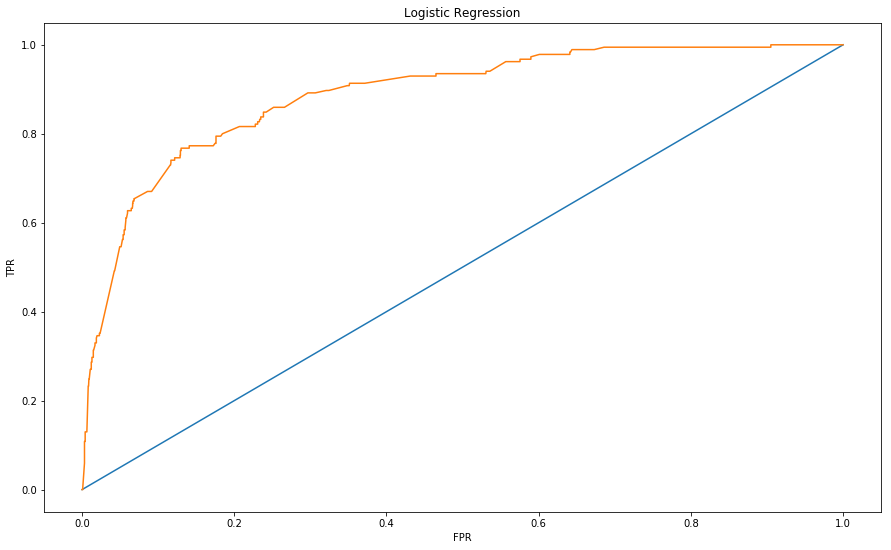

In [767]:
log_est_eng=log_reg_roc(X_train_e,y_train_e,C=10)

[ 0.6039916   0.56271843  0.54157275  0.50728039  0.47419275]
[ 0.37723155  0.39611115  0.42234978  0.42943424  0.41736036]
F1 Score for test: 0.374064837905


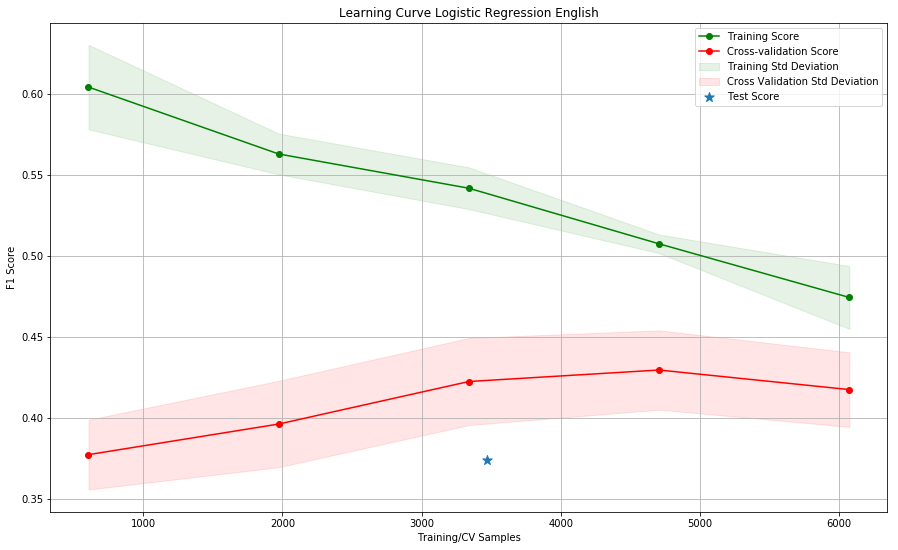

In [768]:
learning_curve_func(log_est_eng,X_train_e,y_train_e,X_test_e,y_test_e,title='Learning Curve Logistic Regression English')

## Examining the coefficients of regression

In [769]:

eng_coef_col=pd.DataFrame(list(zip(eng_columns,log_est_eng.coef_[0])),columns=['name','coef'])

In [770]:
eng_coef_col

,name,coef
0,photos,0.400926
1,timeline,2.210131
2,coca,0.287747
3,cola,1.242254
4,amp,-0.124280
5,microsoft,0.214325
6,new,0.201165
7,photo,0.139413
8,cover,1.595823
9,starbucks,-1.187492


In [771]:
#eng_coef_col[eng_coef_col.coef!=0]
eng_essential_cols=list(eng_coef_col[eng_coef_col['coef']!=0].name)

In [772]:
lang='English'
X_fin_eng=data_merge[data_merge.name_language==lang]
X_fin_edata=X_fin_eng[eng_essential_cols]
y_fin_edata=X_fin_eng['Viral']

In [774]:
X_tr_e,y_tr_e,X_ts_e,y_ts_e=get_best_log_param(X_fin_edata,y_fin_edata,'English')

English
Best Logistic score for language: English 0.423098421607
Best C value for language: English 10


[[2212   33]
 [ 128   57]]
F1 Score for validation set 0.414545454545


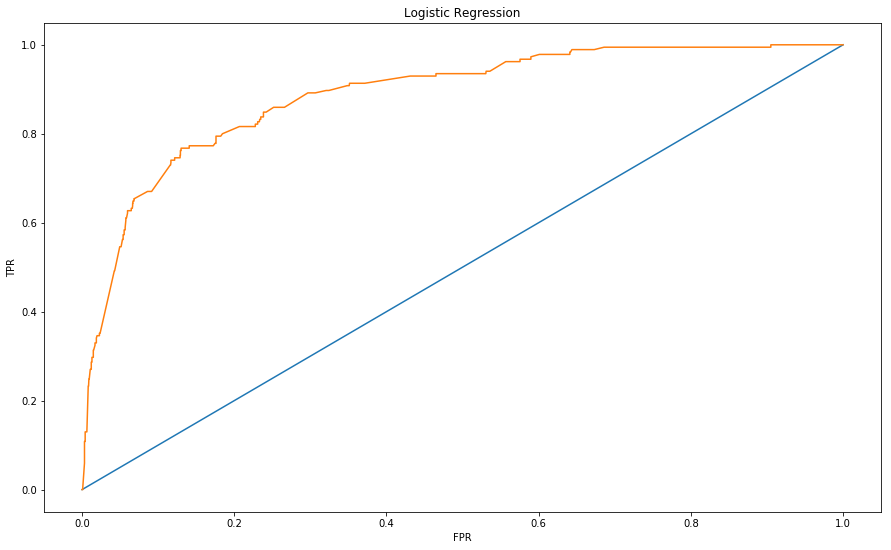

In [775]:
log_est_feng=log_reg_roc(X_tr_e,y_tr_e,C=10)

[ 0.6039916   0.56271843  0.54157275  0.50728039  0.47419275]
[ 0.37723155  0.39611115  0.42234978  0.42943424  0.41736036]
F1 Score for test: 0.374064837905


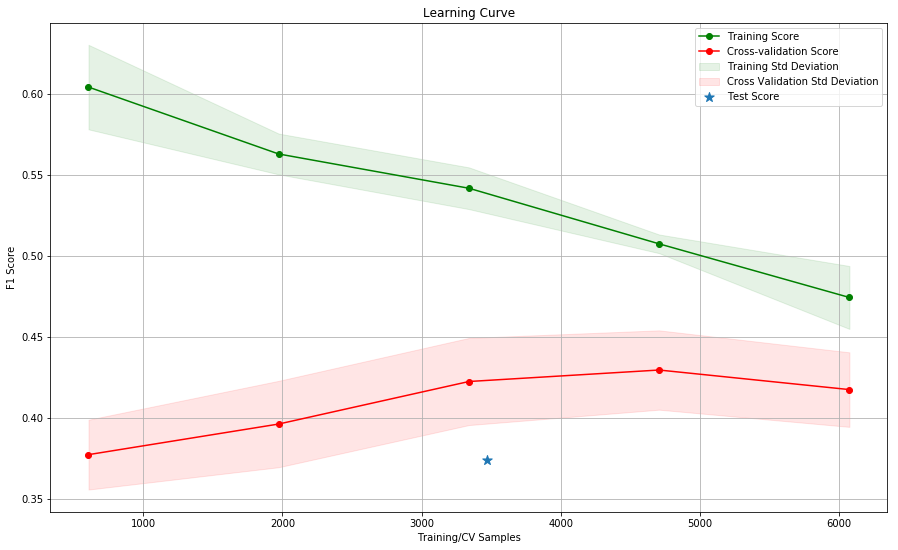

In [776]:
learning_curve_func(log_est_feng,X_tr_e,y_tr_e,X_ts_e,y_ts_e)

# Portuguese Language

## Defining Functions to compute Logistic Regression Model

### Gets the best Logistic Regression Parameter using CV

In [718]:
def get_best_log_param(X_data,y_data,language):
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_data,y_data, test_size=.3, random_state=2911) 
    log_range_port = [1,10,1000,1000000000]
    log_scores_port = []
    print(language)
    for c in log_range_port:
        #knn = KNeighborsClassifier(n_neighbors=k)
        log_p = LogisticRegression(C=c)
        scores = cross_val_score(log_p, X_train_p, y_train_p, cv=5, scoring='f1')
        log_scores_port.append(scores.mean())
    #print(k_scores)
    print('Best Logistic score for language:',language,np.max(log_scores_port))
    print('Best C value for language:',language,log_range_port[np.argmax(log_scores_port)])
    return (X_train_p,y_train_p,X_test_p,y_test_p)
    #print(log_scores_port)
    #log_score_engdict[language]=np.max(log_scores_port)

### Executes  Logistic Regression for any C value and plots ROC AUC curve

In [719]:
def log_reg_roc(X,y,C,title='Logistic Regression'):
    xtrainp, xvalp, ytrainp, yvalp = train_test_split(X, y, test_size=0.3, random_state=4444)
    logp = LogisticRegression(C=10)
    logp.fit(xtrainp,np.ravel(ytrainp))
    y_score=logp.predict_proba(xvalp)[:,1]
    
    fpr, tpr,_ = roc_curve(yvalp, y_score)
    roc_auc = auc(fpr, tpr)
    
    conf=confusion_matrix(yvalp,logp.predict(xvalp))
    print(conf)
    
    print('F1 Score for validation set',metrics.f1_score(yvalp,logp.predict(xvalp)))
    
    plt.figure()
    # Plotting our Baseline..
    plt.figure(figsize=(15,9))
        #plt.scatter(pred, res)
    #plt.subplot(2,2,1)
    #plt.subplot(2, 1, 1)
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr)
    plt.title(title)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    return logp

### Plots the learning Curve for any train test data and estimator

In [720]:
def learning_curve_func(est,X_train_p,y_train_p,X_test_p,y_test_p,title='Learning Curve'):
    train_sizes, train_scores, test_scores=learning_curve(est,X_train_p,y_train_p,cv=4,scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print(train_scores_mean)
    print(test_scores_mean)
    plt.figure(figsize=(15,9))
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training/CV Samples")
    plt.ylabel("F1 Score")
    
       
    # box-like grid
    plt.grid()
       
       # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="g")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="g", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
    
    
    y_pred=est.predict(X_test_p)
    y_test_f1=metrics.f1_score(y_test_p,y_pred)
    print('F1 Score for test:',y_test_f1)
    plt.scatter(len(y_test_p),y_test_f1,marker='*',s=100)
    plt.legend(['Training Score','Cross-validation Score','Training Std Deviation','Cross Validation Std Deviation','Test Score'])




## Preparing Test data and Train Data for Portuguese using selected columns,port_columns

In [777]:
lang='Portuguese'
X_sel_port=data_merge[data_merge.name_language==lang]
X_sel_pdata=X_sel_port[port_columns]
y_sel_pdata=X_sel_port['Viral']

In [778]:
X_train_p,y_train_p,X_test_p,y_test_p=get_best_log_param(X_sel_pdata,y_sel_pdata,'Portuguese')

Portuguese
Best Logistic score for language: Portuguese 0.575950652493
Best C value for language: Portuguese 1000


### Executing Logistic Regression for C=1 as per the above results and getting ROC AUC curve

[[591   8]
 [ 33  26]]
F1 Score for validation set 0.559139784946


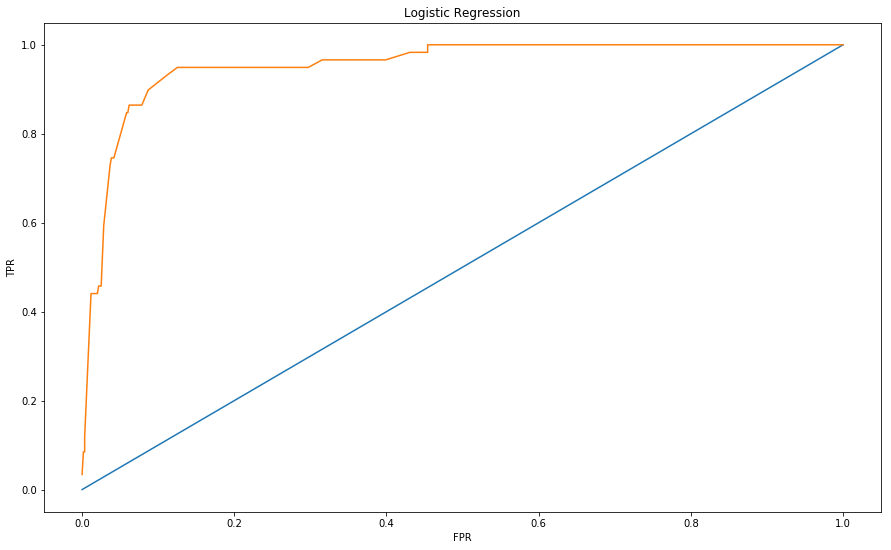

In [779]:
log_est=log_reg_roc(X_train_p,y_train_p,C=1000)

### Plotting the Learning Curve for the Logistic Regression

[ 0.75480769  0.67399749  0.67393843  0.63999702  0.59206374]
[ 0.45631318  0.56698757  0.61825861  0.58420684  0.56632515]
F1 Score for test: 0.504854368932


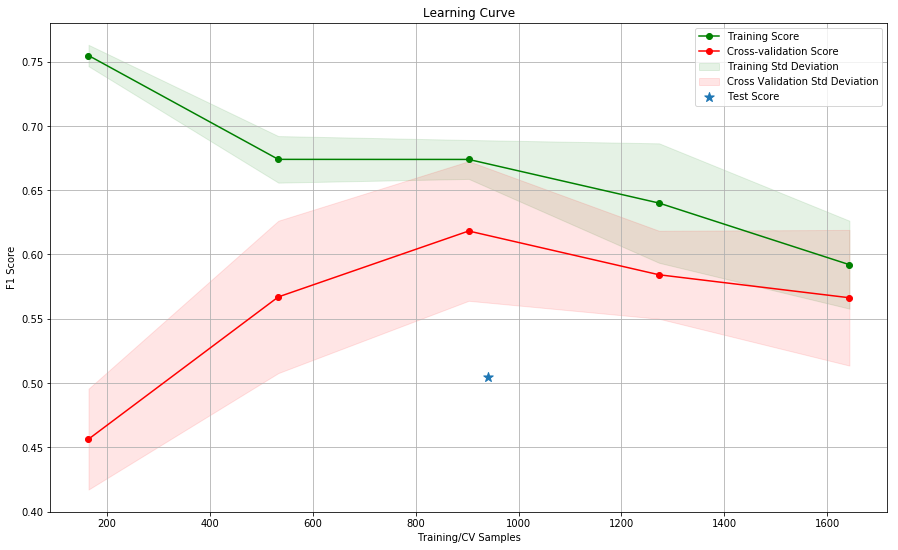

In [780]:
learning_curve_func(log_est,X_train_p,y_train_p,X_test_p,y_test_p)

## Examining the coefficients of the Logistic Regression

In [781]:
port_coef_col=pd.DataFrame(list(zip(port_columns,log_est.coef_[0])),columns=['name','coef'])

In [782]:
port_coef_col[port_coef_col['coef']!=0]

,name,coef
0,type_photo,-1.400058
1,viewer_reaction_NONE,-1.243206
2,weekday,-0.372961
3,company_name_Coca Cola,-2.889520
4,rank_order_ranked,-0.635382
5,rank_order_chronological,-0.443456
6,type_link,-0.980773
7,company_name_Microsoft,-0.857418
8,brand_name_Microsoft,-0.857418
9,brand_name_HonestTea,-1.404650


## Preparing list of essential columns

In [783]:
port_essential_cols=list(port_coef_col[port_coef_col['coef']!=0].name)

## Carrying out Logistic Regression using these columns

In [784]:
lang='Portuguese'
X_fin_port=data_merge[data_merge.name_language==lang]
X_fin_pdata=X_fin_port[port_essential_cols]
y_fin_pdata=X_fin_port['Viral']

In [785]:
X_tr_p,y_tr_p,X_ts_p,y_ts_p=get_best_log_param(X_fin_pdata,y_fin_pdata,'Portuguese')

Portuguese
Best Logistic score for language: Portuguese 0.561664938208
Best C value for language: Portuguese 1000


[[591   8]
 [ 33  26]]
F1 Score for validation set 0.559139784946


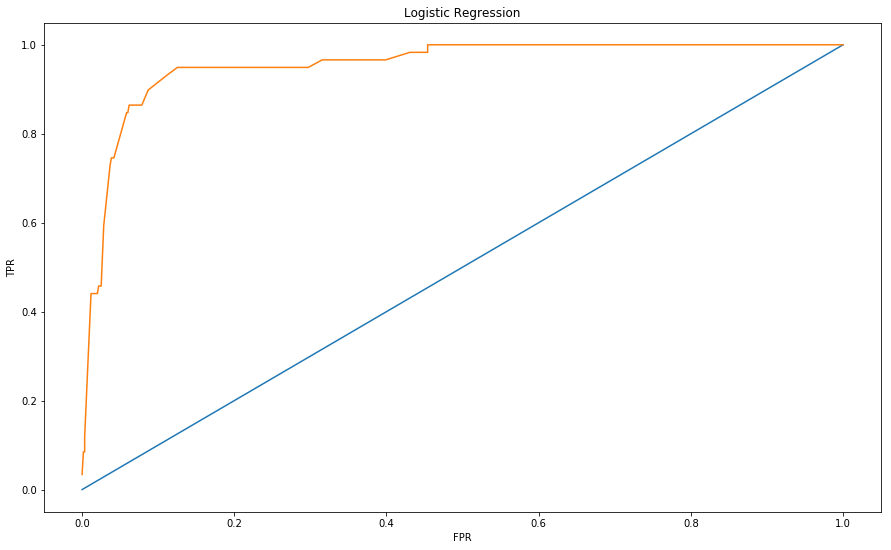

In [786]:
log_est1=log_reg_roc(X_tr_p,y_tr_p,C=1000)

[ 0.75480769  0.66096491  0.66832358  0.63799255  0.58634591]
[ 0.45631318  0.56108479  0.61414088  0.58420684  0.56808498]
F1 Score for test: 0.504854368932


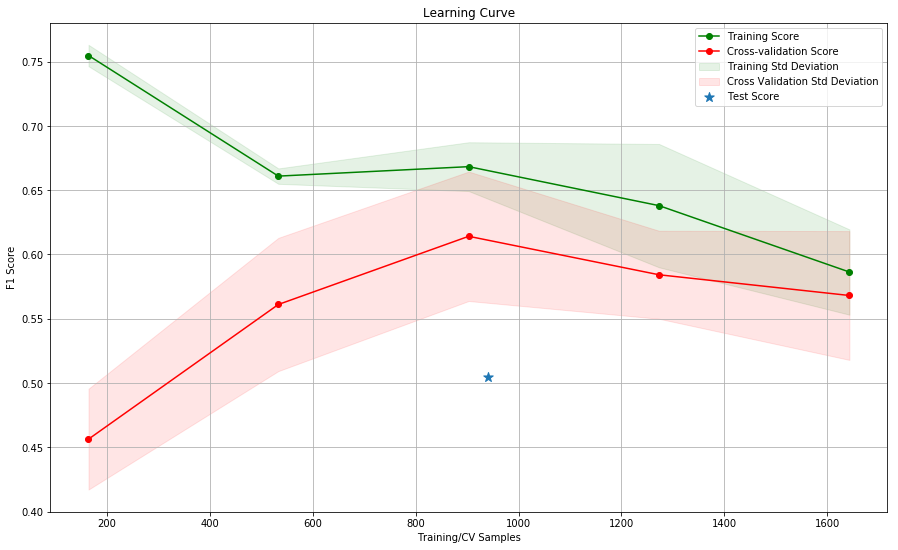

In [787]:
learning_curve_func(log_est1,X_tr_p,y_tr_p,X_ts_p,y_ts_p)


In [788]:
port_coef_col_upd=pd.DataFrame(list(zip(port_essential_cols,log_est1.coef_[0])),columns=['column','coef'])

In [789]:
port_coef_col_upd.sort_values('coef',ascending=False)

,column,coef
30,brand_name_Coca Cola Life,6.559192
18,type_video,3.774377
34,brand_name_VitaminWater,2.526384
27,company_name_Nike,2.339928
28,brand_name_Nike,2.339928
15,brand_name_SimplyOrange,2.195527
35,brand_name_MinuteMaid,2.000360
17,company_name_Starbucks,1.458044
16,brand_name_Starbucks,1.458044
77,loveoverbias,1.189382


In [790]:
port_coef_col_upd[port_coef_col_upd.coef!=0].sort_values('coef',ascending=False)

,column,coef
30,brand_name_Coca Cola Life,6.559192
18,type_video,3.774377
34,brand_name_VitaminWater,2.526384
27,company_name_Nike,2.339928
28,brand_name_Nike,2.339928
15,brand_name_SimplyOrange,2.195527
35,brand_name_MinuteMaid,2.000360
17,company_name_Starbucks,1.458044
16,brand_name_Starbucks,1.458044
77,loveoverbias,1.189382


In [791]:
port_coef_col_upd[port_coef_col_upd.coef!=0].sort_values('coef',ascending=False).to_csv('Port_final_cols.csv')

In [798]:
svm_model(X_sel_edata,y_sel_edata,'English')

English
linear
rbf
Best SVM score for language: English 0.930713313426
Best C value and kernel for language: English linear 10


In [ ]:
X_fin_pdata

## TRying SVM for English

### Function to get the best param for SVM

In [821]:
def svm_model(X_train_data,y_train_data,language):
    kernel_list=['linear','rbf']
    #X_data=data_merge[data_merge.name_language==language].drop(['Viral'],axis=1)
    #y_data=data_merge[(data_merge.name_language==language)].Viral
    X_train, X_test, y_train, y_test = train_test_split(X_train_data,y_train_data, test_size=.3, random_state=2911) 
    svm_range_eng = [10,1,.01,.001]#,.01,.001
    svm_scores_eng = []
    
    print(language)
    for kernel in kernel_list:
        print(kernel)
        for c in svm_range_eng:
                #knn = KNeighborsClassifier(n_neighbors=k)
            svm_mod = svm.SVC(C=c,kernel=kernel)
            scores = cross_val_score(svm_mod, X_train, y_train, cv=5, scoring='f1')
            svm_scores_eng.append(scores.mean())
        #print(k_scores)
    print('Best SVM score for language:',language,np.max(svm_scores_eng))
    print('Best C value and kernel for language:',language,kernel_list[int(np.argmax(svm_scores_eng)/4)],svm_range_eng[np.argmax(svm_scores_eng)])
    return (X_train,y_train,X_test,y_test,kernel_list[int(np.argmax(svm_scores_eng)/4)],svm_range_eng[np.argmax(svm_scores_eng)])
    #svm_score_engdict[language]=np.max(svm_scores_eng)

### Function to execute the SVM model

In [826]:
def exec_svm_svc(X,y,C=1,kernel='linear',title='SVM model ROC AUC'):
    xtrain_eng, xval_eng, ytrain_eng, yval_eng = train_test_split(X, y, test_size=0.3, random_state=4444)
    svm_001 = svm.SVC(C=C,kernel=kernel,probability=True)
    svm_001.fit(xtrain_eng,np.ravel(ytrain_eng))
    fpr, tpr,_=roc_curve(yval_eng, svm_001.predict_proba(xval_eng)[:,1])
    #y_score=svm_001.predict_proba(xval_eng)[:,1]
    
    #fpr, tpr,_ = roc_curve(yval_eng, y_score)
    roc_auc = auc(fpr, tpr)
    
    conf=confusion_matrix(yval_eng,svm_001.predict(xval_eng))
    print(conf)
    
    print('F1 Score',metrics.f1_score(yval_eng,svm_001.predict(xval_eng)))
    
    plt.figure()
    # Plotting our Baseline..
    plt.figure(figsize=(15,9))
        #plt.scatter(pred, res)
    #plt.subplot(2,2,1)
    #plt.subplot(2, 1, 1)
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr)
    plt.title(title)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    return(svm_001)

In [799]:
## For ENglish language

English
linear
rbf
Best SVM score for language: English 0.378931179423
Best C value and kernel for language: English linear 10
[[2205   40]
 [ 135   50]]
F1 Score 0.363636363636
[ 0.63665137  0.60283267  0.57030009  0.52333916  0.47532138]
[ 0.39019794  0.39261202  0.41504505  0.42231445  0.3807518 ]
F1 Score for test: 0.360975609756
CPU times: user 5min 33s, sys: 2.62 s, total: 5min 36s
Wall time: 6min 2s


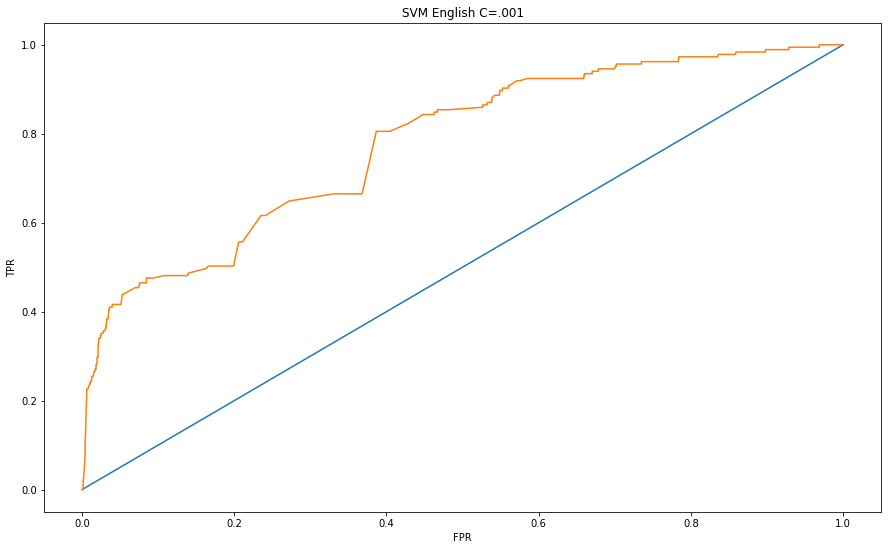

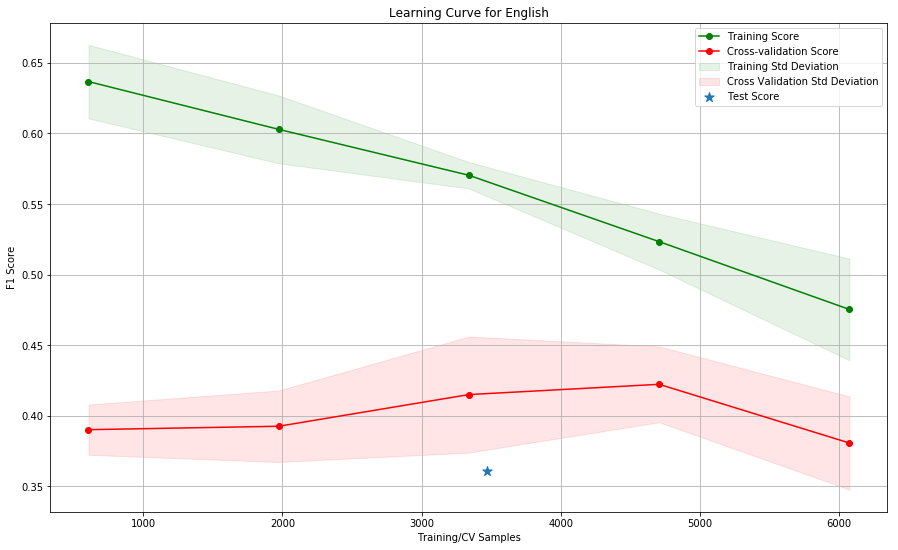

In [823]:
%%time
X_train_svm,y_train_svm,X_test_svm,y_test_svm,kernel,C=svm_model(X_sel_edata,y_sel_edata,'English')
svm_est=exec_svm_svc(X_train_svm,y_train_svm,C=C,kernel=kernel,title='SVM model ROC AUC English')
learning_curve_func(svm_est,X_train_svm,y_train_svm,X_test_svm,y_test_svm,title='Learning Curve for English')

## Portuguese Language

Portuguese
linear
rbf
Best SVM score for language: Portuguese 0.607786520759
Best C value and kernel for language: Portuguese linear 10
[[583  16]
 [ 24  35]]
F1 Score 0.636363636364
[ 0.78321678  0.67399749  0.67234551  0.66186422  0.65418051]
[ 0.49204958  0.55183183  0.60957818  0.60978998  0.58571956]
F1 Score for test: 0.559322033898
CPU times: user 5.07 s, sys: 83.7 ms, total: 5.15 s
Wall time: 5.18 s


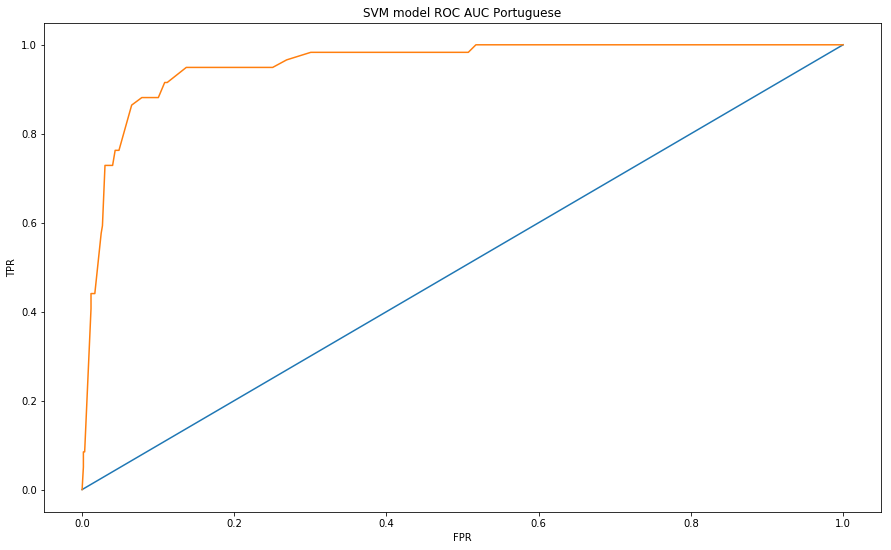

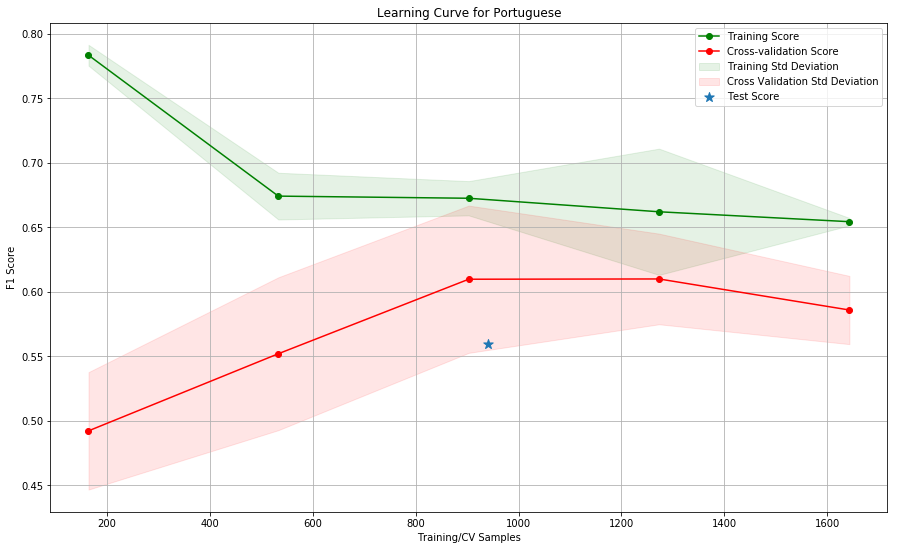

In [827]:
%%time
X_trainp_svm,y_trainp_svm,X_testp_svm,y_testp_svm,kernelp,Cp=svm_model(X_fin_pdata,y_fin_pdata,'Portuguese')
svm_estp=exec_svm_svc(X_trainp_svm,y_trainp_svm,C=Cp,kernel=kernelp,title='SVM model ROC AUC Portuguese')
learning_curve_func(svm_estp,X_trainp_svm,y_trainp_svm,X_testp_svm,y_testp_svm,title='Learning Curve for Portuguese')

In [825]:
#learning_curve_func(svm_est,X_train_svm,y_train_svm,X_test_svm,y_test_svm,title='Learning Curve')

## XGB boost for Portuguese

In [838]:
%%time
xtrain_port, xval_port, ytrain_port, yval_port = train_test_split(X_trainp_svm, y_trainp_svm, test_size=0.3, random_state=4444)


gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       #max_depth=3,
                       objective='binary:logistic',
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(xtrain_port,ytrain_port),(xval_port,yval_port)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    xtrain_port, ytrain_port, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=50,
                    verbose=True #gives output log as below
                   )


[0]	validation_0-rmse:0.461615	validation_1-rmse:0.463358
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.425126	validation_1-rmse:0.428075
[2]	validation_0-rmse:0.39317	validation_1-rmse:0.397384
[3]	validation_0-rmse:0.365231	validation_1-rmse:0.370797
[4]	validation_0-rmse:0.340871	validation_1-rmse:0.347821
[5]	validation_0-rmse:0.319701	validation_1-rmse:0.328051
[6]	validation_0-rmse:0.30136	validation_1-rmse:0.311073
[7]	validation_0-rmse:0.285559	validation_1-rmse:0.296331
[8]	validation_0-rmse:0.273135	validation_1-rmse:0.285643
[9]	validation_0-rmse:0.262866	validation_1-rmse:0.277245
[10]	validation_0-rmse:0.25134	validation_1-rmse:0.266119
[11]	validation_0-rmse:0.24205	validation_1-rmse:0.257512
[12]	validation_0-rmse:0.234548	validation_1-rmse:0.250863
[13]	validation_0-rmse:0.229487	validation_1-rmse:0.247421
[14]	validation_0-rmse:0.2239

[137]	validation_0-rmse:0.183745	validation_1-rmse:0.204112
[138]	validation_0-rmse:0.183737	validation_1-rmse:0.204027
[139]	validation_0-rmse:0.183738	validation_1-rmse:0.204057
[140]	validation_0-rmse:0.183726	validation_1-rmse:0.203979
[141]	validation_0-rmse:0.183717	validation_1-rmse:0.203995
[142]	validation_0-rmse:0.183708	validation_1-rmse:0.203914
[143]	validation_0-rmse:0.183695	validation_1-rmse:0.203859
[144]	validation_0-rmse:0.183694	validation_1-rmse:0.203895
[145]	validation_0-rmse:0.183695	validation_1-rmse:0.203873
[146]	validation_0-rmse:0.183686	validation_1-rmse:0.203891
[147]	validation_0-rmse:0.183669	validation_1-rmse:0.203862
[148]	validation_0-rmse:0.183658	validation_1-rmse:0.203879
[149]	validation_0-rmse:0.183648	validation_1-rmse:0.203902
[150]	validation_0-rmse:0.183639	validation_1-rmse:0.203915
[151]	validation_0-rmse:0.183633	validation_1-rmse:0.2038
[152]	validation_0-rmse:0.18362	validation_1-rmse:0.20383
[153]	validation_0-rmse:0.183611	validation_

In [839]:
rmse(gbm.predict(X_testp_svm, ntree_limit=gbm.best_ntree_limit),y_testp_svm) 

0.22360679774997896

In [840]:
y_pred_xgb=gbm.predict(X_testp_svm, ntree_limit=gbm.best_ntree_limit)

In [836]:
y_pred_xgb

array([ -1.48051977e-03,   6.09993935e-03,  -1.48051977e-03,
         3.07896733e-03,  -1.48051977e-03,   6.09993935e-03,
        -1.38992071e-03,  -6.37114048e-04,  -1.38992071e-03,
        -1.48051977e-03,  -1.48051977e-03,   2.52842903e-04,
         6.09993935e-03,   6.09993935e-03,  -2.46310234e-03,
         2.89738178e-04,   7.64206052e-03,   8.29326510e-02,
         6.09993935e-03,   3.07896733e-03,   2.89738178e-04,
         6.93145692e-02,  -3.00830603e-03,   5.02809286e-02,
         2.89738178e-04,   7.64206052e-03,   6.09993935e-03,
         7.86380470e-02,   2.52842903e-04,  -1.48051977e-03,
         1.02452636e-02,   4.16812301e-03,   2.89738178e-04,
         2.89738178e-04,   6.09993935e-03,  -1.37102604e-03,
        -1.48051977e-03,   1.01623595e-01,   3.50812078e-03,
        -1.48051977e-03,   2.89738178e-04,  -1.48051977e-03,
        -3.36605310e-03,   6.95672035e-02,   1.02452636e-02,
        -2.09325552e-02,   4.21719015e-01,  -1.14258528e-02,
         3.07089090e-03,

In [832]:
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [841]:
metrics.f1_score(y_testp_svm,gbm.predict(X_testp_svm, ntree_limit=gbm.best_ntree_limit))

0.61157024793388437

In [881]:
%%time
xgb_tuned_param=[{'learning_rate':[.01,.1,1,10,.001],'max_depth':[3,4,5,6,7,8]}]
clf = GridSearchCV(xgb.XGBClassifier(),xgb_tuned_param, cv=5, scoring='f1')
#clf = GridSearchCV(SVC(C=1), tuned_parameters , cv=5, scoring=score)
clf.fit(X_trainp_svm, y_trainp_svm)

print("Best parameters set found on development set:")
print()
print(clf.best_estimator_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))



Best parameters set found on development set:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Grid scores on development set:

0.546 (+/-0.020) for {'learning_rate': 0.01, 'max_depth': 3}
0.571 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 4}
0.669 (+/-0.021) for {'learning_rate': 0.01, 'max_depth': 5}
0.668 (+/-0.021) for {'learning_rate': 0.01, 'max_depth': 6}
0.668 (+/-0.021) for {'learning_rate': 0.01, 'max_depth': 7}
0.668 (+/-0.021) for {'learning_rate': 0.01, 'max_depth': 8}
0.616 (+/-0.013) for {'learning_rate': 0.1, 'max_depth': 3}
0.653 (+/-0.021) for {'learning_rate': 0.1, 'max_depth': 4}
0.661 (+/-0.019) for {'learning_rate': 0.1, 

In [906]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=5,
                       objective='binary:logistic',
                       learning_rate=.01, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

#eval_set=[(xtrain_port,ytrain_port),(xval_port,yval_port)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    np.array(X_trainp_svm), np.array(y_trainp_svm), 
                    eval_metric='rmse',
                    verbose=True #gives output log as below
                   )

In [907]:
metrics.f1_score(np.array(y_testp_svm),gbm.predict(np.array(X_testp_svm)))

0.66153846153846152

ImportError: cannot import name 'convert_to_graphviz'

In [905]:
X_testp_svm.brand

9143     0
12328    0
5543     0
4752     0
10844    1
13412    0
10321    0
13625    0
15655    0
2438     0
15181    0
2911     0
15721    0
7948     0
10319    0
11268    0
9011     0
1921     0
5109     0
8836     0
4704     0
14371    0
7882     0
3970     0
9370     0
10236    0
9419     0
2347     0
14850    0
14777    0
        ..
3337     0
7826     0
16688    0
2659     0
7857     0
3662     0
8830     0
13006    0
14362    0
4658     0
13382    0
5685     0
10117    0
10280    0
10775    0
7704     0
10202    0
14385    0
12571    0
8262     0
4963     0
16206    0
14049    0
11332    0
15163    0
4662     0
11695    0
10173    0
14498    0
8541     0
Name: Viral, Length: 8099, dtype: int64

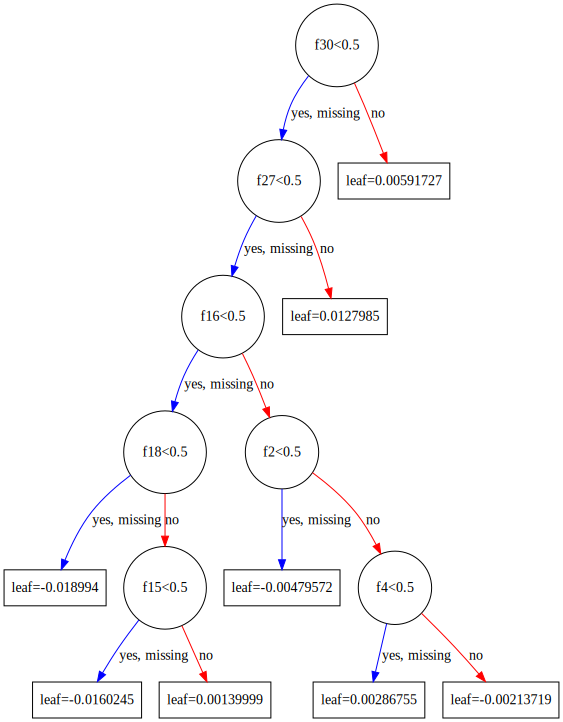

In [911]:

# load data
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
#X = dataset[:,0:8]
#y = dataset[:,8]
# fit model no training data
#model = XGBClassifier()
#model.fit(X, y)
# plot single tree
#plot_tree(gbm)
#plt.show()
xgboost.to_graphviz(gbm,num_trees=5)
#graphviz.Source(export_graphviz(tree))

## XGB for English

In [856]:
%%time
xtrain_eng, xval_eng, ytrain_eng, yval_eng = train_test_split(X_train_svm, y_train_svm, test_size=0.3, random_state=4444)


gbm_eng = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=4,
                       objective='binary:logistic',
                       learning_rate=1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(xtrain_eng,ytrain_eng),(xval_eng,yval_eng)] #tracking train/validation error as we go
fit_model = gbm_eng.fit( 
                    xtrain_eng, ytrain_eng, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=50,
                    verbose=True #gives output log as below
                   )



[0]	validation_0-rmse:0.252229	validation_1-rmse:0.246144
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.235208	validation_1-rmse:0.227387
[2]	validation_0-rmse:0.229577	validation_1-rmse:0.223056
[3]	validation_0-rmse:0.226862	validation_1-rmse:0.223779
[4]	validation_0-rmse:0.226488	validation_1-rmse:0.223059
[5]	validation_0-rmse:0.225607	validation_1-rmse:0.222815
[6]	validation_0-rmse:0.224822	validation_1-rmse:0.222003
[7]	validation_0-rmse:0.224537	validation_1-rmse:0.221803
[8]	validation_0-rmse:0.224216	validation_1-rmse:0.222015
[9]	validation_0-rmse:0.223944	validation_1-rmse:0.222178
[10]	validation_0-rmse:0.223211	validation_1-rmse:0.222267
[11]	validation_0-rmse:0.22294	validation_1-rmse:0.221986
[12]	validation_0-rmse:0.222753	validation_1-rmse:0.221874
[13]	validation_0-rmse:0.222637	validation_1-rmse:0.222006
[14]	validation_0-rmse:0.2

In [857]:
rmse(gbm_eng.predict(X_test_svm, ntree_limit=gbm_eng.best_ntree_limit),y_test_svm) 

0.25909000159284751

In [858]:
metrics.f1_score(y_test_svm,gbm_eng.predict(X_test_svm, ntree_limit=gbm_eng.best_ntree_limit))

0.3719676549865229

## Hyperparameter tuning (XG booster) for English set 

In [915]:
%%time
xgb_tuned_param=[{'learning_rate':[.01,.1,1,10,.001],'max_depth':[3,4,5,6,7,8]}]
clf = GridSearchCV(xgb.XGBClassifier(),xgb_tuned_param, cv=5, scoring='f1')
#clf = GridSearchCV(SVC(C=1), tuned_parameters , cv=5, scoring=score)
clf.fit(xtrain_eng, ytrain_eng)

print("Best parameters set found on development set:")
print()
print(clf.best_estimator_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))


Best parameters set found on development set:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Grid scores on development set:

0.377 (+/-0.020) for {'learning_rate': 0.01, 'max_depth': 3}
0.382 (+/-0.019) for {'learning_rate': 0.01, 'max_depth': 4}
0.384 (+/-0.021) for {'learning_rate': 0.01, 'max_depth': 5}
0.387 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 6}
0.391 (+/-0.025) for {'learning_rate': 0.01, 'max_depth': 7}
0.394 (+/-0.024) for {'learning_rate': 0.01, 'max_depth': 8}
0.388 (+/-0.020) for {'learning_rate': 0.1, 'max_depth': 3}
0.389 (+/-0.018) for {'learning_rate': 0.1, 'max_depth': 4}
0.388 (+/-0.024) for {'learning_rate': 0.1, 'ma

In [864]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full validation set.")
print()
yval_eng, y_pred_eng = yval_eng, clf.predict(xval_eng)
print(classification_report(yval_eng, y_pred_eng))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full test set.")
print()
y_test_data, y_pred_test_eng = y_test_svm, clf.predict(X_test_svm)
print(classification_report(y_test_svm, y_pred_test_eng))
print()
conf = confusion_matrix(y_test_svm, y_pred_test_eng)
print(conf)

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full validation set.

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2245
          1       0.67      0.30      0.42       185

avg / total       0.92      0.94      0.92      2430

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full test set.

             precision    recall  f1-score   support

          0       0.94      0.99      0.96      3192
          1       0.67      0.26      0.38       279

avg / total       0.92      0.93      0.92      3471


[[3156   36]
 [ 206   73]]


In [863]:
clf.best_params_

{'learning_rate': 1, 'max_depth': 5}

In [874]:
rf=RandomForestRegressor(n_estimators=10000,
                        max_depth=3,criterion='mse')

In [875]:
rf.fit(X_train_svm,y_train_svm)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [876]:
y_pred_rf=rf.predict(X_test_svm)

In [878]:
y_pred_rf

array([ 0.03863606,  0.03871657,  0.03867507, ...,  0.03863606,
        0.03867507,  0.13672934])

In [912]:
data_merge.to_csv('DataWithTransPosts.csv')

In [913]:
master.to_csv('Master.csv')